In [27]:
import pandas as pd
import numpy as np
import cvxpy as cvx
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [245]:
ticker_df = pd.read_csv('ticker_data.csv')
factor_df = pd.read_csv('factor_data.csv')
ticker_df.set_index('timestep', inplace=True)
factor_df.set_index('timestep', inplace=True)
stock_df = ticker_df.join(factor_df, how='left')

#print(factor_df.head())

#print(factor_df.head())
#print(ticker_df.head())

# log(market_cap)

#print(ticker_df)

mktcapticker = ticker_df[['market_cap','ticker','pb']]  #apply(np.log) #(ticker_df['market_cap'].unique())

#print(mktcapticker)

marketcap1 = mktcapticker['market_cap'].loc[mktcapticker['ticker'] == 0]

#print(marketcap1)


pb1 = mktcapticker['pb'].loc[mktcapticker['ticker']== 0]

#print(pb1)

factor_df = factor_df.join(marketcap1.apply(np.log),how='right')
factor_df = factor_df.join(pb1.apply(np.square),how='right')

factor_df

#print(factor_df)
#print(logmarketcap)

,VIX,COPP,3M_R,US_TRY,BIG_IX,SMALL_IX,SENTI,TEMP,RAIN,OIL,market_cap,pb
timestep,,,,,,,,,,,,
0,15.000000,90.000000,0.060000,0.270000,100.000000,100.000000,80.000000,74.819656,0.639413,65.000000,25.411426,0.828939
1,14.458574,98.095646,0.060474,0.269558,99.595377,99.623765,79.035163,72.808788,0.173868,72.594727,25.406583,0.792642
2,14.023697,91.706222,0.060615,0.269159,99.208056,99.249246,78.287603,73.285432,0.814486,67.663561,25.401153,0.796205
3,14.429497,85.731487,0.060333,0.264040,99.780371,99.628927,79.847429,79.046248,0.400980,79.658158,25.396682,0.824453
4,14.818531,93.597128,0.060188,0.260119,100.401161,100.195401,80.655441,76.964039,0.754570,77.026123,25.397269,0.793825
5,15.448807,88.205751,0.060104,0.255144,100.816818,100.809452,79.640886,81.689098,0.692238,58.334379,25.397502,0.865832
6,15.487798,83.772465,0.059916,0.243820,100.323571,100.733352,80.456500,75.383050,0.312020,51.261137,25.398387,0.814907
7,15.233116,95.048014,0.059608,0.241452,100.929583,101.208406,81.294413,64.018339,1.000000,70.667935,25.401881,0.774115
8,16.324766,89.539271,0.059350,0.236272,100.422246,100.862543,80.794910,77.075553,0.000000,90.264576,25.403983,0.813473


2.7340618803832
0.12584593152903348


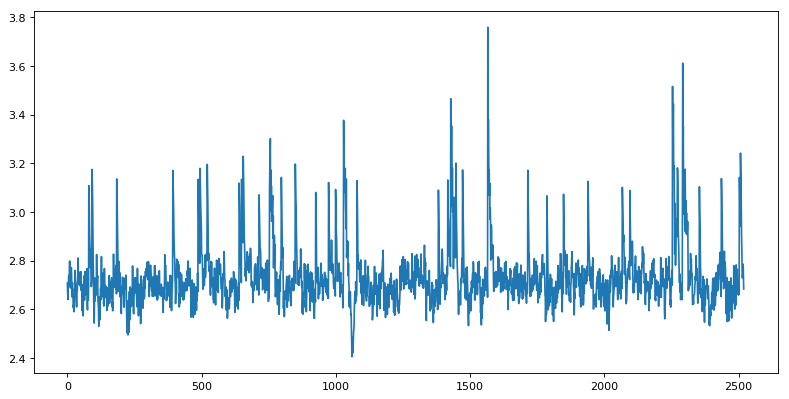

In [265]:
# Feature datasets

VIX = stock_df['VIX'].drop_duplicates().apply(np.log)
COPP = stock_df['COPP'].drop_duplicates()
THREEM_R = stock_df['3M_R'].drop_duplicates()
US_TRY = stock_df['US_TRY'].drop_duplicates()
BIG_IX = stock_df['BIG_IX'].drop_duplicates()
SMALL_IX = stock_df['SMALL_IX'].drop_duplicates()
SENTI = stock_df['SENTI'].drop_duplicates()
TEMP = stock_df['TEMP'].drop_duplicates()
RAIN = stock_df['RAIN'].drop_duplicates()
OIL = stock_df['OIL'].drop_duplicates()


plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

print(VIX.mean())
print(VIX.std())

plt.plot(VIX)

In [266]:
r_1 = []
timestep = []
big_ix = []
big_ix_dchg = []
marks = []
pb_1 = []
z = 0 
pb1_dchg = []

# ticker 1 and features
for i in range(0,len(stock_df),1000):
    r_1.append(stock_df['returns'].iloc[i])
    timestep.append(stock_df.index[i])
    pb_1.append(stock_df['pb'].iloc[i])
    #big_ix.append(stock_df['BIG_IX'].iloc[i])
    big_ix_dchg.append(((stock_df['BIG_IX'].iloc[i])/stock_df['BIG_IX'].iloc[i-500])-1)
    pb1_dchg.append(((stock_df['pb'].iloc[i])/stock_df['pb'].iloc[i-1000])-1)
    #print(stock_df['BIG_IX'].iloc[i])
    #print(stock_df['BIG_IX'].iloc[i-500])
    #print(((stock_df['BIG_IX'].iloc[i])/stock_df['BIG_IX'].iloc[i-500])-1,stock_df['BIG_IX'].iloc[i])
    if big_ix_dchg[z] < -0.02:
        marks.append(len(big_ix))
    z += 1

In [267]:
# Scaling
t1_std = np.std(r_1)
t1_mean = np.mean(r_1)
z_t1 = (r_1-t1_mean)/t1_std

pb1_std = np.std(pb_1)
pb1_mean = np.mean(pb_1)
z_pb1 = (pb_1-pb1_mean)/pb1_std

In [268]:
# 5th order polynomial fit between ticker 1 returns and BIG_IX

#pcoeff1 = np.polyfit(pb1_dchg[:], r_1[:],5)
#print(poly1)

#poly1 = pcoeff1[0]*(np.power(pb1_dchg,5)) + pcoeff1[1]*(np.power(pb1_dchg,4)) + pcoeff1[2]*(np.power(pb1_dchg,3)) + \
#pcoeff1[3]*(np.power(pb1_dchg,2)) + pcoeff1[4]*(np.power(pb1_dchg,1)) + pcoeff1[5]*(np.power(pb1_dchg,0))

#plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

#plt.plot(timestep,poly1)

#np.corrcoef(poly1,r_1)

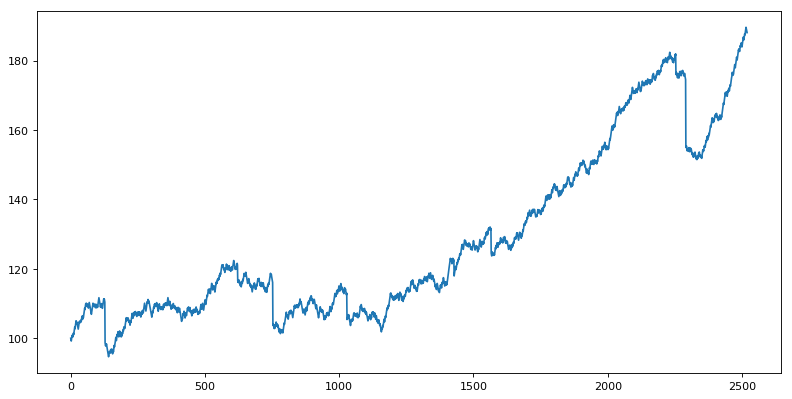

In [269]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(BIG_IX)

#for xc in marks:
#    plt.axvline(x=xc)

In [270]:
#http://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/http://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/

#X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, \
#                                                    stratify=iris.target, random_state=123456)

X_train = factor_df.iloc[:1511]
X_test = factor_df.iloc[1511:len(factor_df)-1]

print(X_train.head())

#print(len(X_train.columns))

Y_train = r_1[1:1512]
Y_test = r_1[1512:]

print(len(X_test),len(Y_test))

#print(X_train[0:5])
#print(Y_train[0:5])

                VIX       COPP      3M_R    US_TRY      BIG_IX    SMALL_IX  \
timestep                                                                     
0         15.000000  90.000000  0.060000  0.270000  100.000000  100.000000   
1         14.458574  98.095646  0.060474  0.269558   99.595377   99.623765   
2         14.023697  91.706222  0.060615  0.269159   99.208056   99.249246   
3         14.429497  85.731487  0.060333  0.264040   99.780371   99.628927   
4         14.818531  93.597128  0.060188  0.260119  100.401161  100.195401   

              SENTI       TEMP      RAIN        OIL  market_cap        pb  
timestep                                                                   
0         80.000000  74.819656  0.639413  65.000000   25.411426  0.828939  
1         79.035163  72.808788  0.173868  72.594727   25.406583  0.792642  
2         78.287603  73.285432  0.814486  67.663561   25.401153  0.796205  
3         79.847429  79.046248  0.400980  79.658158   25.396682  0.824453

In [271]:
#rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)
#rf.fit(X_train, Y_train)

In [272]:
#predicted = rf.predict(X_test)
#accuracy = f1_score(Y_test, predicted)


#print(predicted)

#print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
#print(f'Mean accuracy score: {accuracy:.3}')

# *Should scale datasets by mean and standard deviation

/Users/Brian/ENTER/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(-4.7379989069308763,
 -1.4379989069308756,
 -5.1831926110949619e-05,
 7.5466020693276938e-05)

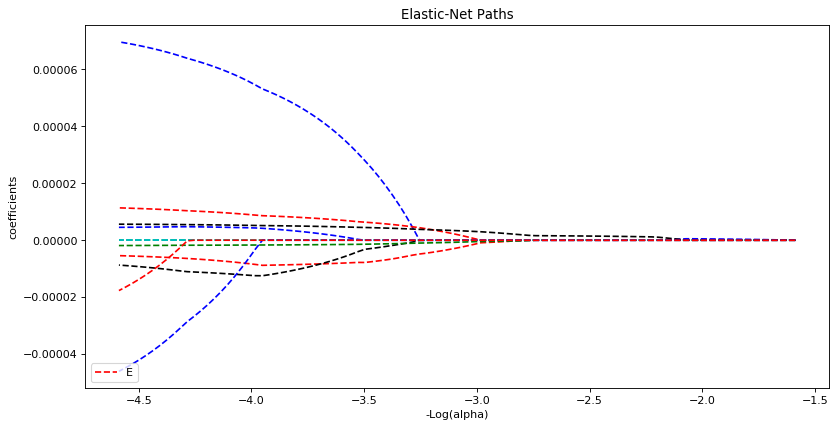

In [273]:
# Rainy Lake Hydrology

from sklearn.linear_model import enet_path

alphas_enet, coefs_enet, _ = enet_path(X_train, Y_train, l1_ratio = 0.5, normalize=True)

#print(np.log(alphas))

#print(coefs)

# Display results

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.figure(1)
ax = plt.gca()

from itertools import cycle

colors = cycle(['b', 'r', 'g', 'c', 'k'])

neg_log_alphas_enet = np.log10(alphas_enet)

for coef_e, c in zip(coefs_enet, colors):
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths')
plt.legend((l2), ('Elastic-Net'), loc='lower left')
plt.axis('tight')

/Users/Brian/ENTER/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


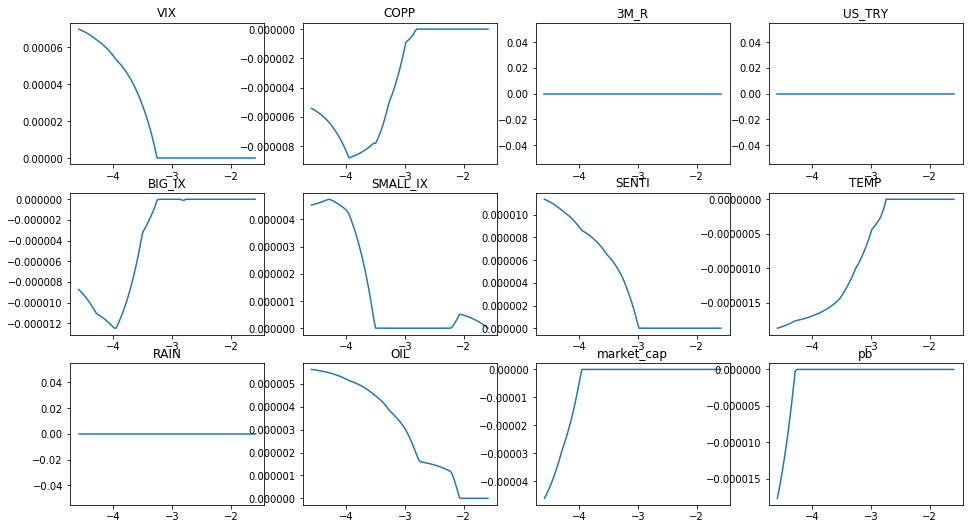

In [274]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')


plt.figure(figsize=(16,12))
plt.subplot(4,4,1)

for k in range(0,len(factor_df.columns)):
    plt.subplot(4,4,k+1)
    plt.plot(np.log10(alphas_enet),coefs_enet[k])
    plt.title('{}'.format(factor_df.columns[k]))
    #plt.xlabel('Log(alpha)')
    #plt.ylabel('coefficients')

#fig.tight_layout()
#print(len(alphas),len(coefs))
#print(alphas)
#print(coefs)

In [169]:
# returns of ticker 0 and market cap of ticker 0 

#logmktcapseries = pd.Series(logmarketcap, index=factor_df.index)

X_train2 = logmarketcap.iloc[:1511]
X_test2 = logmarketcap.iloc[1511:len(logmktcapseries)-1]

Y_train2 = r_1[1:1512]
Y_test2 = r_1[1512:]

In [163]:
alphas_2, coefs_2, _ = enet_path(X_train2, Y_train2, l1_ratio = 0.5, normalize=True)

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

plt.figure(figsize=(16,12))
plt.subplot(4,4,1)

for k in range(0,len(factor_df.columns)):
    plt.subplot(4,4,k+1)
    plt.plot(np.log10(alphas_2),coefs_2[k])
    plt.title('{}'.format(factor_df.columns[k]))

ValueError: Expected 2D array, got 1D array instead:
array=[  1.08653063e+11   1.76759990e+11   5.78756421e+10 ...,   5.32557598e+10
   6.97711864e+10   8.26470004e+10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.